In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
import skbio
from collections import *
from statistics import *
import random
import scipy

In [2]:
nodes = pd.read_csv("node.csv")
nodes.index = np.arange(1, len(nodes) + 1)
nodes['group'].fillna('Unknown', inplace=True)
print("Original number of total nodes:",len(nodes))

G_wet =  nx.DiGraph()
G_wet.add_nodes_from(nodes["node_id"])

nx.set_node_attributes(G_wet, nodes["name"], "name")
nx.set_node_attributes(G_wet, nodes["group"], "group")

print(len(G_wet))

G_dry = nx.DiGraph()
G_dry.add_nodes_from(nodes["node_id"])

nx.set_node_attributes(G_dry, nodes["name"], "name")
nx.set_node_attributes(G_dry, nodes["group"], "group")

print(len(G_dry))
print('\n')

edges_wet = pd.read_csv("edge_wet.csv")
print(len(edges_wet))

weighted_e_wet = list(edges_wet.itertuples(index=False, name=None))
print(len(weighted_e_wet))
nx.DiGraph()
G_wet.add_weighted_edges_from(weighted_e_wet)  
print("Original number of G_wet edges:",len(G_wet.edges))

#G_wet.edges.data()
print(len(G_wet.edges.data()))
print('\n')

edges_dry = pd.read_csv("edge_dry.csv")
print(len(edges_dry))

weighted_e_dry = list(edges_dry.itertuples(index=False, name=None))
print(len(weighted_e_dry))

G_dry.add_weighted_edges_from(weighted_e_dry)
print("Original number of G_dry edges:",len(G_dry.edges))

#G_dry.edges.data()
print(len(G_dry.edges.data()))

Original number of total nodes: 128
128
128


2106
2106
Original number of G_wet edges: 2106
2106


2137
2137
Original number of G_dry edges: 2137
2137


In [3]:
removal=[]
removal.append(nodes[nodes['name']=='Input'].index.values.astype(int)[0])
removal.append(nodes[nodes['name']=='Output'].index.values.astype(int)[0])
removal.append(nodes[nodes['name']=='Respiration'].index.values.astype(int)[0])
removal.append(nodes[nodes['name']=='Water POC'].index.values.astype(int)[0])
removal.append(nodes[nodes['name']=='Benthic POC'].index.values.astype(int)[0])
removal.append(nodes[nodes['name']=='DOC'].index.values.astype(int)[0])
print("Nodes have been removed:",removal)
print('\n')

G_wet.remove_nodes_from(removal)
G_dry.remove_nodes_from(removal)

isolate_wet=list(nx.isolates(G_wet))
print("G_wet isolated node(s):",isolate_wet)
isolate_dry=list(nx.isolates(G_dry))
print("G_dry isolated node(s):",isolate_dry)
print('\n')

G_wet.remove_nodes_from(isolate_wet)
print("Valid number of G_wet nodes:",len(G_wet))
print("Valid number of G_wet edges:",len(G_wet.edges))
print(len(G_wet.edges.data()))
print('\n')

G_dry.remove_nodes_from(isolate_dry)
print("Valid number of G_dry nodes:",len(G_dry))
print("Valid number of G_dry edges:",len(G_dry.edges))
print(len(G_dry.edges.data()))

Nodes have been removed: [126, 127, 128, 123, 124, 125]


G_wet isolated node(s): [12]
G_dry isolated node(s): [12]


Valid number of G_wet nodes: 121
Valid number of G_wet edges: 1767
1767


Valid number of G_dry nodes: 121
Valid number of G_dry edges: 1799
1799


In [4]:
# node attributes
species = nx.get_node_attributes(G_wet,"name")
#print(species)

groups = nx.get_node_attributes(G_wet,"group")
#print(groups)

class_species = {}
for k, v in groups.items():
    if v in class_species:
        class_species[v].append(k)
    else:
        class_species[v] = [k]
print(len(class_species))
print(class_species)

11
{'Unknown': [1, 2, 3, 4, 5, 6, 7, 28, 33, 46, 47, 52, 53, 54, 55, 56, 67, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 97, 98, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122], 'Demersal Producer': [8], 'Seagrass Producer': [9, 10, 11], 'Algae Producer': [13, 14], 'Microbial Microfauna': [15, 16, 17], 'Zooplankton Microfauna': [18, 19, 20, 21, 22, 23], 'Sediment Organism Microfauna': [24, 25, 26], 'Macroinvertebrates': [27, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 50, 51], 'Pelagic Fishes': [57, 58, 59, 65, 66, 72, 91, 99], 'Benthic Fishes': [60, 61, 63, 93, 94, 95, 96], 'Demersal Fishes': [62, 64, 68, 69, 100]}


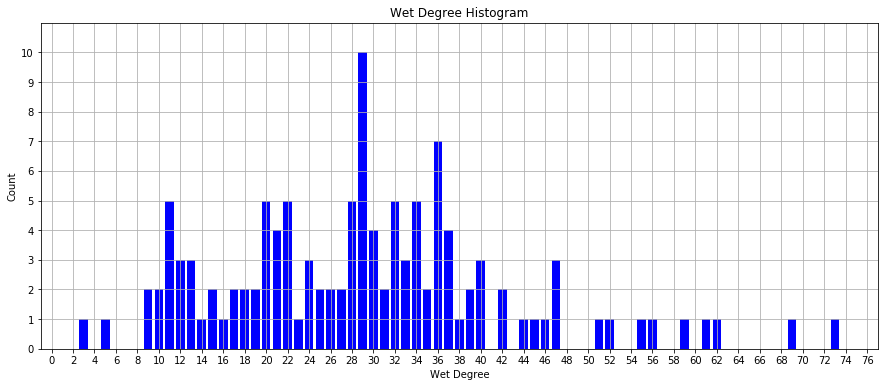

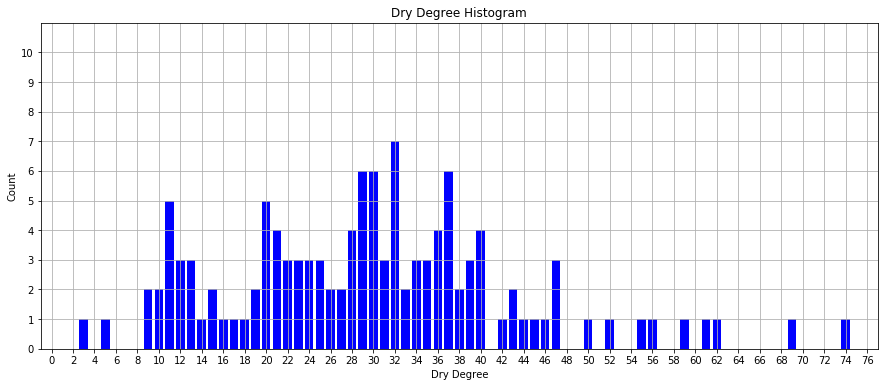

In [5]:
# Degree distribution

degree_sequence_wet = sorted([d for n, d in G_wet.degree()], reverse=True) 
degreeCount = Counter(degree_sequence_wet)
deg, cnt = zip(*degreeCount.items())

plt.figure(3,figsize=(15,6)) 
plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Wet Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Wet Degree")
plt.xlim((-1, 77))
plt.ylim((0, 11))
my_x_ticks = np.arange(0, 77, 2)
my_y_ticks = np.arange(0, 11, 1)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.grid()
plt.show()

degree_sequence_dry = sorted([d for n, d in G_dry.degree()], reverse=True)  
degreeCount = Counter(degree_sequence_dry)
deg, cnt = zip(*degreeCount.items())

plt.figure(3,figsize=(15,6)) 
plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Dry Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Dry Degree")
plt.xlim((-1, 77))
plt.ylim((0, 11))
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.grid()
plt.show()

In [6]:
# link density (average degree)
print("G_wet link density:",round((len(G_wet.edges)/len(G_wet)),2))
print("G_dry link density:",round((len(G_dry.edges)/len(G_dry)),2))
print('\n')

G_wet link density: 14.6
G_dry link density: 14.87




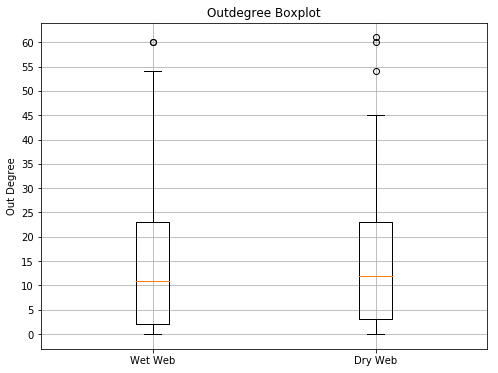

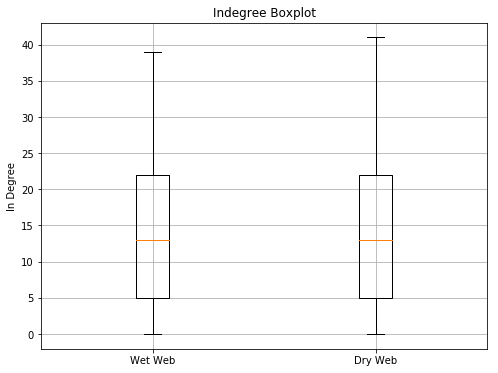

In [7]:
# boxplot
wet_out_degrees = dict(G_wet.out_degree())
dry_out_degrees = dict(G_dry.out_degree())

plt.figure(figsize=(8,6))
my_y_ticks = np.arange(0, 120, 5)
plt.yticks(my_y_ticks)
plt.ylabel("Out Degree")
plt.boxplot([list(wet_out_degrees.values()),list(dry_out_degrees.values())],
            labels=('Wet Web','Dry Web'))
plt.title("Outdegree Boxplot")
plt.grid()
plt.show()

wet_in_degrees = dict(G_wet.in_degree())
dry_in_degrees = dict(G_dry.in_degree())

plt.figure(figsize=(8,6))
my_y_ticks = np.arange(0, 120, 5)
plt.yticks(my_y_ticks)
plt.ylabel("In Degree")
plt.boxplot([list(wet_in_degrees.values()),list(dry_in_degrees.values())],
            labels=('Wet Web','Dry Web'))
plt.title("Indegree Boxplot")
plt.grid()
plt.show()

### Functions for Statistics

In [8]:
remove_num=[]
for i in range(1,101):
    remove_num.append(i)

In [9]:
threshold =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [10]:
def get_complexity(G,method,variable):
    
    consumer = []
    theweight = {}
    for u,v in G.edges():
        weight = G.get_edge_data(u,v)['weight']
        if v not in consumer:
            consumer.append(v)
            theweight[v] = weight
        else:
            theweight[v] = theweight[v] + weight        
        
    complexity_list = []
    
    
    if variable == 'n':
        for n in remove_num:
        
            complexity = []
            for i in range(1,201):    # (simulations * 200 times) for each n in remove_num     

                G_copy = G.copy()
                List = random.sample(G_copy.node(),n) 
                for i in List:       
                    G_copy.remove_node(i)
                              
                T = True
                while T:
                    consumer_copy = []
                    remove = []
                    theweight_copy = {}
                    for u,v in G_copy.edges():
                        weight_copy = G_copy.get_edge_data(u,v)['weight']
                        if v not in consumer_copy:
                            consumer_copy.append(v)
                            theweight_copy[v] = weight_copy
                        else:
                            theweight_copy[v] = theweight_copy[v] + weight_copy

                    for key in theweight_copy.keys():   
                        if key not in theweight.keys():
                            G_copy.remove_node(key)
                    
                    for key in theweight_copy.keys():         
                        if theweight_copy[key]/theweight[key] < 0.5:                     
                            remove.append(key)

                    if len(remove) != 0:
                        for i in remove:
                            G_copy.remove_node(i)
                      
                    else:
                        T = False
                complexity.append(method(G_copy))  
    
            get_mean = sum(complexity)/len(complexity)
            complexity_list.append(get_mean)

    
    if variable == 't':
        for t in threshold:
            complexity = []
            for i in range(1,1001):  # (simulations * 1000 times) for each n in remove_num
        
                G_copy = G.copy()
                List = random.sample(G_copy.node(),15) 
                for i in List:       
                    G_copy.remove_node(i)
                
                T = True
                while T:
                    consumer_copy = []
                    remove = []
                    theweight_copy = {}
                    for u,v in G_copy.edges():
                        weight_copy = G_copy.get_edge_data(u,v)['weight']
                        if v not in consumer_copy:
                            consumer_copy.append(v)
                            theweight_copy[v] = weight_copy
                        else:
                            theweight_copy[v] = theweight_copy[v] + weight_copy

                    for key in theweight_copy.keys():    
                        if key not in theweight.keys(): 
                            G_copy.remove_node(key)
                    
                    for key in theweight_copy.keys():         
                        if theweight_copy[key]/theweight[key] < t:                     
                            remove.append(key)

                    if len(remove) != 0:
                        for i in remove:
                            G_copy.remove_node(i)                    

                    else:
                        T = False
                complexity.append(method(G_copy))  

            get_mean = sum(complexity)/len(complexity)
            complexity_list.append(get_mean)
    
    return complexity_list  


In [34]:
# Complexity Method 1
# C = connectance 
# (C, the fraction of all possible links that are realized in a food web)
def get_connectance(G):

    if  len(G) == 0:
        connectance = 0
    else:
        connectance = len(G.edges)/(len(G)*len(G))
        
    return connectance

In [12]:
# Complexity Method 2
# LD = link density

def get_link_density(G):
    if len(G.nodes)==0:
        link_density=0
    else:
        link_density = (len(G.edges)/len(G.nodes))
    
    return link_density


In [13]:
# Complexity Method 3
# Topological link density 
# topological link density can 
# be computed by averaging the number of prey species over all consumers

def get_topo_link_density(G):
    in_degree_dict = dict(G.in_degree)
    d = dict((k, v) for k, v in in_degree_dict.items() if v > 0)
    if len(d)==0:
        topo_link_density = 0
    else:
        topo_link_density = sum(in_degree_dict.values())/len(d)
    return topo_link_density

In [14]:
# Complexity Method 4
# LDq = quantitative unweighted link density

def get_unweighted_density(G):
    in_flow=[]
    for n in list(G.nodes()):
        in_flow.append(list(G.in_edges(n)))
    
    in_flow_list=[]
    for i in range(len(in_flow)):
        my_in_flow=[]
        for j in range(len(in_flow[i])):
            in_energy = list(G.get_edge_data(*in_flow[i][j]).values())
            my_in_flow.append(in_energy[0])
        in_flow_list.append(my_in_flow)
    
    shannon_in=[]
    for i in range(len(in_flow_list)):
        get_shannon = skbio.diversity.alpha.shannon(in_flow_list[i],base=2.71828182846)
        shannon_in.append(get_shannon)
    #shannon_in
    
    nj_list = []   # inflow
    for i in range(len(shannon_in)):
        nj = math.exp(shannon_in[i])
        nj_list.append(nj)

    #sum(nj_list)
       
    out_flow=[]
    for n in list(G.nodes()):
        out_flow.append(list(G.out_edges(n)))
    
    out_flow_list=[]
    for i in range(len(out_flow)):
        my_out_flow=[]
        for j in range(len(out_flow[i])):
            out_energy = list(G.get_edge_data(*out_flow[i][j]).values())
            my_out_flow.append(out_energy[0])
        out_flow_list.append(my_out_flow)
    
    shannon_out=[]
    for i in range(len(out_flow_list)):
        get_shannon = skbio.diversity.alpha.shannon(out_flow_list[i],base=2.71828182846)
        shannon_out.append(get_shannon)

    #shannon_out
    ni_list = []   # outflow
    for i in range(len(shannon_out)):
        ni = math.exp(shannon_out[i])
        ni_list.append(ni)
    
    if len(G) == 0:
        LDq_unweighted=0
    else:
        LDq_unweighted = (sum(nj_list)+sum(ni_list))/(2*len(G))
    
    return LDq_unweighted

In [15]:
# Complexity Method 5

def get_weighted_density(G):
    in_flow=[]
    for n in list(G.nodes()):
        in_flow.append(list(G.in_edges(n)))
    
    in_flow_list=[]
    for i in range(len(in_flow)):
        my_in_flow=[]
        for j in range(len(in_flow[i])):
            in_energy = list(G.get_edge_data(*in_flow[i][j]).values())
            my_in_flow.append(in_energy[0])
        in_flow_list.append(my_in_flow)
    
    Bj = []
    for List in in_flow_list:
        total_in_flow = sum(List)
        Bj.append(total_in_flow)
    
    shannon_in=[]
    for i in range(len(in_flow_list)):
        get_shannon = skbio.diversity.alpha.shannon(in_flow_list[i],base=2.71828182846)
        shannon_in.append(get_shannon)
    #shannon_in
    
    nj_list = []   # inflow
    for i in range(len(shannon_in)):
        nj = math.exp(shannon_in[i])
        nj_list.append(nj)

    #sum(nj_list)
    
    
    out_flow=[]
    for n in list(G.nodes()):
        out_flow.append(list(G.out_edges(n)))
    
    out_flow_list=[]
    for i in range(len(out_flow)):
        my_out_flow=[]
        for j in range(len(out_flow[i])):
            out_energy = list(G.get_edge_data(*out_flow[i][j]).values())
            my_out_flow.append(out_energy[0])
        out_flow_list.append(my_out_flow)
    
    Bi = []
    for List in out_flow_list:
        total_out_flow = sum(List)
        Bi.append(total_out_flow)
    
    shannon_out=[]
    for i in range(len(out_flow_list)):
        get_shannon = skbio.diversity.alpha.shannon(out_flow_list[i],base=2.71828182846)
        shannon_out.append(get_shannon)
    
    B_total = (sum(Bi)+sum(Bj))/2
    #print(B_total)
    
    ni_list = []   #outflow
    for i in range(len(shannon_out)):
        ni = math.exp(shannon_out[i])
        ni_list.append(ni)

    bi_ni_list = []
    for i in range(0,len(G)):
        bi_ni = Bi[i]*ni_list[i]
        bi_ni_list.append(bi_ni)
        
    bj_nj_list = []
    for j in range(0,len(G)):
        bj_nj = Bj[j]*nj_list[j]
        bj_nj_list.append(bj_nj)
        
    if B_total == 0:
         LDq_weighted = 0
    else:
        LDq_weighted = (sum(bi_ni_list)+sum(bj_nj_list))/(2*B_total)
    return LDq_weighted

### Change N Removed

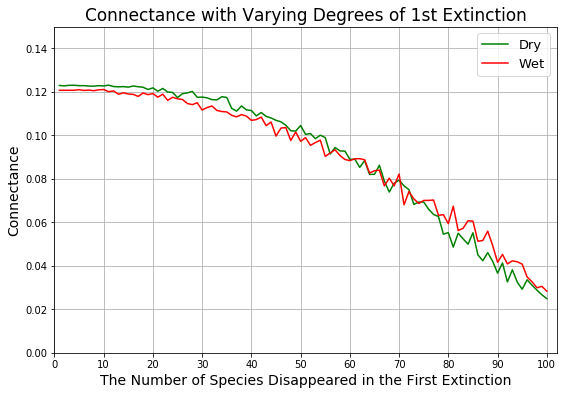

In [35]:
connectance_dry_n = get_complexity(G_dry,get_connectance,'n')
connectance_wet_n = get_complexity(G_wet,get_connectance,'n')


fig01 = plt.figure(figsize=(9,6))
plt.plot(remove_num, connectance_dry_n,color="g",label = 'Dry')
plt.plot(remove_num, connectance_wet_n,color="r",label = 'Wet')

plt.xlim((0, 102))
plt.ylim((0, 0.15))

my_x_ticks = np.arange(0, 102, 10)
my_y_ticks = np.arange(0, 0.15, 0.02)

plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)


plt.xlabel("The Number of Species Disappeared in the First Extinction",fontsize=14)
plt.ylabel("Connectance",fontsize=14)

plt.title("Connectance with Varying Degrees of 1st Extinction",fontsize=17)
plt.legend(fontsize=13)
plt.grid()
plt.show()

fig01.savefig('01_Connectance.jpg')

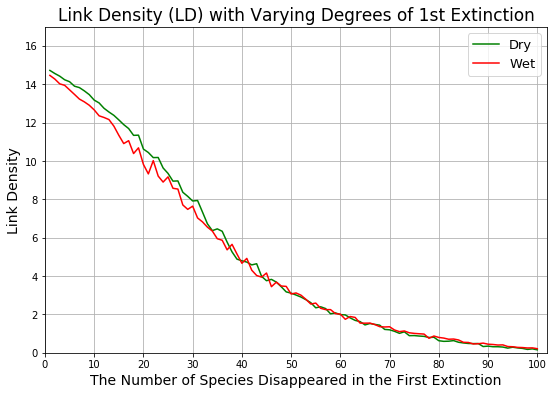

In [17]:
link_density_dry_n = get_complexity(G_dry,get_link_density,'n')
link_density_wet_n = get_complexity(G_wet,get_link_density,'n')

fig02 = plt.figure(figsize=(9,6))
plt.plot(remove_num, link_density_dry_n,color="g",label = 'Dry')
plt.plot(remove_num, link_density_wet_n,color="r",label = 'Wet')

plt.xlim((0, 102))
plt.ylim((0, 17))

my_x_ticks = np.arange(0, 102, 10)
my_y_ticks = np.arange(0, 17, 2)

plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)


plt.xlabel("The Number of Species Disappeared in the First Extinction",fontsize=14)
plt.ylabel("Link Density",fontsize=14)

plt.title("Link Density (LD) with Varying Degrees of 1st Extinction",fontsize=17)
plt.legend(fontsize=13)
plt.grid()
plt.show()

fig02.savefig('01_Link Density.jpg')

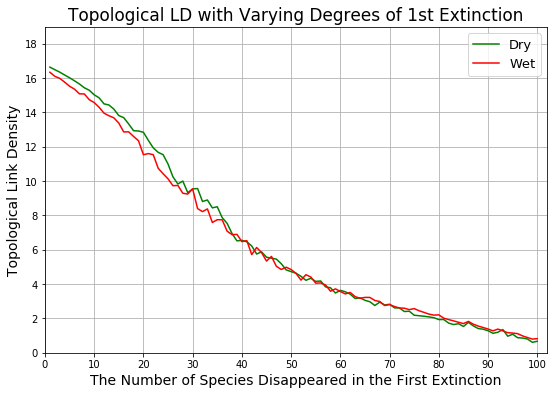

In [18]:
topo_link_density_dry_n = get_complexity(G_dry,get_topo_link_density,'n')
topo_link_density_wet_n = get_complexity(G_wet,get_topo_link_density,'n')

fig03 = plt.figure(figsize=(9,6))

plt.plot(remove_num, topo_link_density_dry_n,color="g",label = 'Dry')
plt.plot(remove_num, topo_link_density_wet_n,color="r",label = 'Wet')

plt.xlim((0, 102))
plt.ylim((0, 19))

my_x_ticks = np.arange(0, 102, 10)
my_y_ticks = np.arange(0, 19, 2)

plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)

plt.xlabel("The Number of Species Disappeared in the First Extinction",fontsize=14)
plt.ylabel("Topological Link Density",fontsize=14)

plt.title("Topological LD with Varying Degrees of 1st Extinction",fontsize=17)
plt.legend(fontsize=13)
plt.grid()
plt.show()

fig03.savefig('01_Topological LD.jpg')

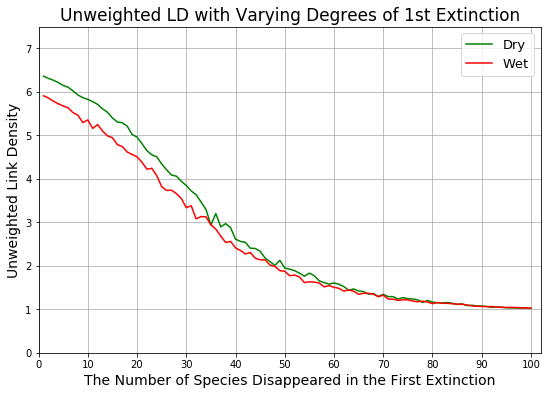

In [19]:
unweighted_density_dry_n = get_complexity(G_dry,get_unweighted_density,'n')
unweighted_density_wet_n = get_complexity(G_wet,get_unweighted_density,'n')

fig04 = plt.figure(figsize=(9,6))

plt.plot(remove_num, unweighted_density_dry_n,color="g",label = 'Dry')
plt.plot(remove_num, unweighted_density_wet_n,color="r",label = 'Wet')

plt.xlim((0, 102))
plt.ylim((0, 7.5))

my_x_ticks = np.arange(0, 102, 10)
my_y_ticks = np.arange(0, 7.5, 1)

plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)

plt.xlabel("The Number of Species Disappeared in the First Extinction",fontsize=14)
plt.ylabel("Unweighted Link Density",fontsize=14)

plt.title("Unweighted LD with Varying Degrees of 1st Extinction",fontsize=17)
plt.legend(fontsize=13)
plt.grid()
plt.show()

fig04.savefig('01_Unweighted LD.jpg')

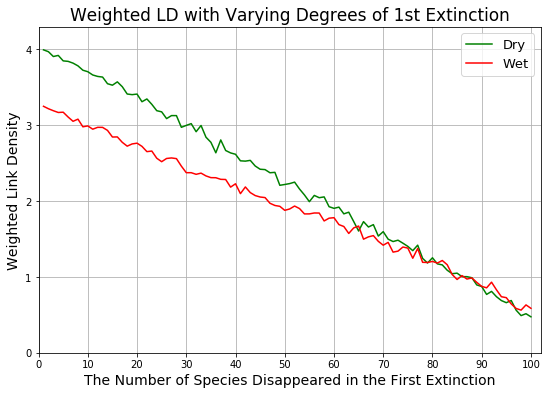

In [20]:
weighted_density_dry_n = get_complexity(G_dry,get_weighted_density,'n')
weighted_density_wet_n = get_complexity(G_wet,get_weighted_density,'n')

fig05 = plt.figure(figsize=(9,6))

plt.plot(remove_num, weighted_density_dry_n,color="g",label = 'Dry')
plt.plot(remove_num, weighted_density_wet_n,color="r",label = 'Wet')

plt.xlim((0, 102))
plt.ylim((0, 4.3))

my_x_ticks = np.arange(0, 102, 10)
my_y_ticks = np.arange(0, 4.3, 1)

plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)

plt.xlabel("The Number of Species Disappeared in the First Extinction",fontsize=14)
plt.ylabel("Weighted Link Density",fontsize=14)

plt.title("Weighted LD with Varying Degrees of 1st Extinction",fontsize=17)
plt.legend(fontsize=13)
plt.grid()
plt.show()

fig05.savefig('01_Weighted LD.jpg')

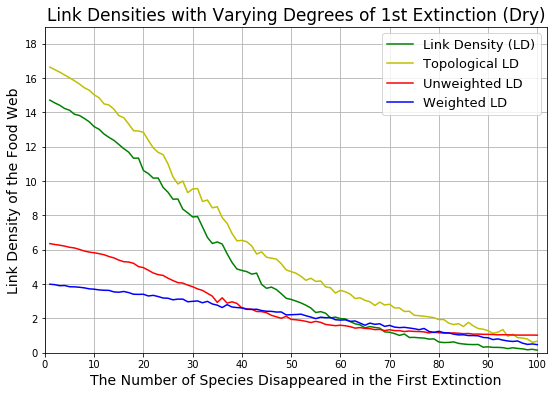

In [21]:
fig06 = plt.figure(figsize=(9,6))

plt.plot(remove_num, link_density_dry_n,color="g",label = 'Link Density (LD)')
plt.plot(remove_num, topo_link_density_dry_n,color="y",label = 'Topological LD')
plt.plot(remove_num, unweighted_density_dry_n,color="r",label = 'Unweighted LD')
plt.plot(remove_num, weighted_density_dry_n,color="b",label = 'Weighted LD')

plt.xlim((0, 102))
plt.ylim((0, 19))

my_x_ticks = np.arange(0, 102, 10)
my_y_ticks = np.arange(0, 19, 2)

plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)

plt.xlabel("The Number of Species Disappeared in the First Extinction",fontsize=14)
plt.ylabel("Link Density of the Food Web",fontsize=14)

plt.title("Link Densities with Varying Degrees of 1st Extinction (Dry)",fontsize=17)

plt.legend(fontsize=13)
plt.grid()
plt.show()

fig06.savefig('01_Link Densities_Dry.jpg')

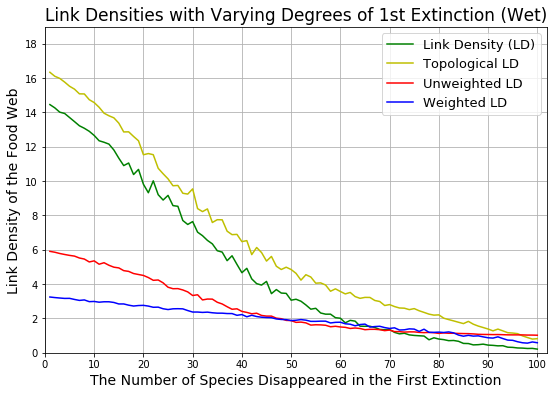

In [22]:
fig07 = plt.figure(figsize=(9,6))

plt.plot(remove_num, link_density_wet_n,color="g",label = 'Link Density (LD)')
plt.plot(remove_num, topo_link_density_wet_n,color="y",label = 'Topological LD')
plt.plot(remove_num, unweighted_density_wet_n,color="r",label = 'Unweighted LD')
plt.plot(remove_num, weighted_density_wet_n,color="b",label = 'Weighted LD')

plt.xlim((0, 102))
plt.ylim((0, 19))

my_x_ticks = np.arange(0, 102, 10)
my_y_ticks = np.arange(0, 19, 2)

plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)

plt.xlabel("The Number of Species Disappeared in the First Extinction",fontsize=14)
plt.ylabel("Link Density of the Food Web",fontsize=14)

plt.title("Link Densities with Varying Degrees of 1st Extinction (Wet)",fontsize=17)

plt.legend(fontsize=13)
plt.grid()
plt.show()

fig07.savefig('01_Link Densities_Wet.jpg')

### Change Threshold

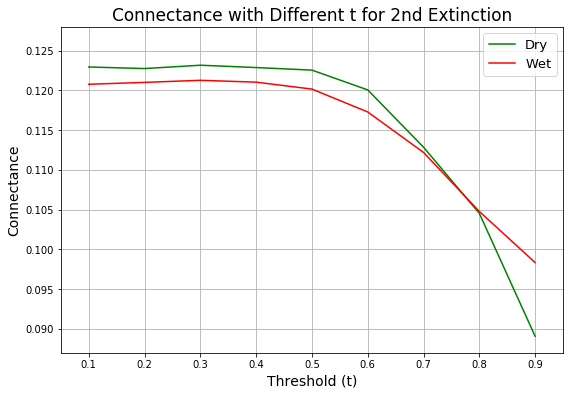

In [36]:
connectance_dry_t = get_complexity(G_dry,get_connectance,'t')
connectance_wet_t = get_complexity(G_wet,get_connectance,'t')


fig11 = plt.figure(figsize=(9,6))
plt.plot(threshold,connectance_dry_t,color="g",label = 'Dry')
plt.plot(threshold,connectance_wet_t,color="r",label = 'Wet')

plt.xlim((0.05, 0.95))
plt.ylim((0.087, 0.128))

my_x_ticks = np.arange(0.1, 0.95, 0.1)
my_y_ticks = np.arange(0.09, 0.128, 0.005)

plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)


plt.xlabel("Threshold (t)",fontsize=14)
plt.ylabel("Connectance",fontsize=14)

plt.title("Connectance with Different t for 2nd Extinction",fontsize=17)
plt.legend(fontsize=13)
plt.grid()
plt.show()

fig11.savefig('02_Connectance.jpg')

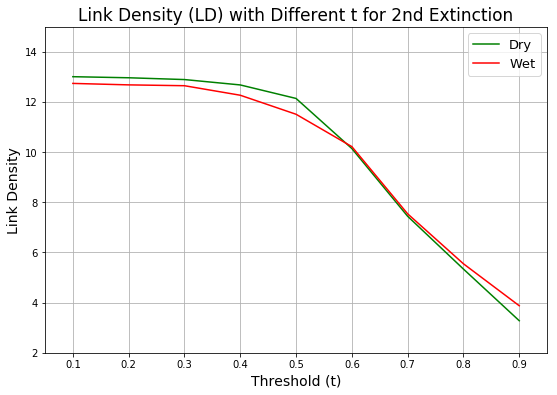

In [24]:
link_density_dry_t = get_complexity(G_dry,get_link_density,'t')
link_density_wet_t = get_complexity(G_wet,get_link_density,'t')

fig12 = plt.figure(figsize=(9,6))
plt.plot(threshold,link_density_dry_t,color="g",label = 'Dry')
plt.plot(threshold,link_density_wet_t,color="r",label = 'Wet')

plt.xlim((0.05, 0.95))
plt.ylim((2, 15))

my_x_ticks = np.arange(0.1, 0.95, 0.1)
my_y_ticks = np.arange(2, 15, 2)

plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)


plt.xlabel("Threshold (t)",fontsize=14)
plt.ylabel("Link Density",fontsize=14)

plt.title("Link Density (LD) with Different t for 2nd Extinction",fontsize=17)
plt.legend(fontsize=13)
plt.grid()
plt.show()

fig12.savefig('02_Link Density.jpg')

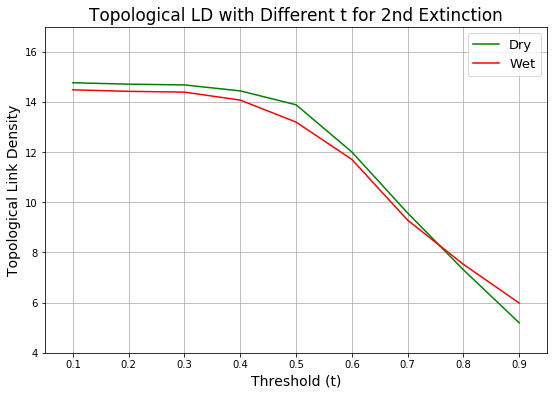

In [25]:
topo_link_density_dry_t = get_complexity(G_dry,get_topo_link_density,'t')
topo_link_density_wet_t = get_complexity(G_wet,get_topo_link_density,'t')


fig13 = plt.figure(figsize=(9,6))
plt.plot(threshold,topo_link_density_dry_t,color="g",label = 'Dry')
plt.plot(threshold,topo_link_density_wet_t,color="r",label = 'Wet')

plt.xlim((0.05, 0.95))
plt.ylim((4, 17))

my_x_ticks = np.arange(0.1, 0.95, 0.1)
my_y_ticks = np.arange(4, 17, 2)

plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)


plt.xlabel("Threshold (t)",fontsize=14)
plt.ylabel("Topological Link Density",fontsize=14)

plt.title("Topological LD with Different t for 2nd Extinction",fontsize=17)
plt.legend(fontsize=13)
plt.grid()
plt.show()

fig13.savefig('02_Topological LD.jpg')

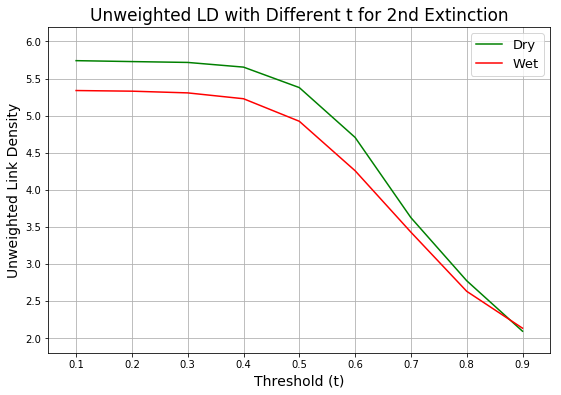

In [26]:
unweighted_density_dry_t = get_complexity(G_dry,get_unweighted_density,'t')
unweighted_density_wet_t = get_complexity(G_wet,get_unweighted_density,'t')


fig14 = plt.figure(figsize=(9,6))
plt.plot(threshold,unweighted_density_dry_t,color="g",label = 'Dry')
plt.plot(threshold,unweighted_density_wet_t,color="r",label = 'Wet')

plt.xlim((0.05, 0.95))
plt.ylim((1.8, 6.2))

my_x_ticks = np.arange(0.1, 0.95, 0.1)
my_y_ticks = np.arange(2, 6.2, 0.5)

plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)


plt.xlabel("Threshold (t)",fontsize=14)
plt.ylabel("Unweighted Link Density",fontsize=14)

plt.title("Unweighted LD with Different t for 2nd Extinction",fontsize=17)
plt.legend(fontsize=13)
plt.grid()
plt.show()

fig14.savefig('02_Unweighted LD.jpg')

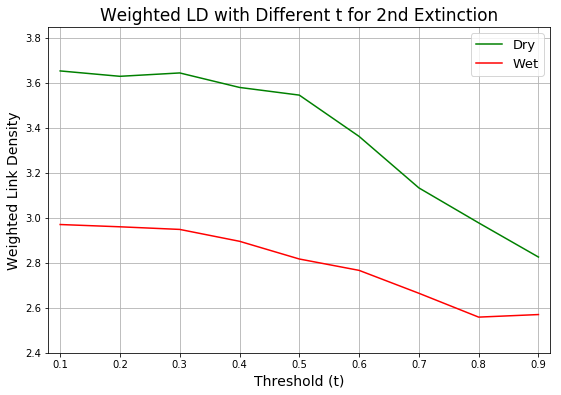

In [27]:
weighted_density_dry_t = get_complexity(G_dry,get_weighted_density,'t')
weighted_density_wet_t = get_complexity(G_wet,get_weighted_density,'t')

fig15 = plt.figure(figsize=(9,6))
plt.plot(threshold,weighted_density_dry_t,color="g",label = 'Dry')
plt.plot(threshold,weighted_density_wet_t,color="r",label = 'Wet')

plt.xlim((0.08, 0.92))
plt.ylim((2.4, 3.85))

my_x_ticks = np.arange(0.1, 0.92, 0.1)
my_y_ticks = np.arange(2.4, 3.85, 0.2)

plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)


plt.xlabel("Threshold (t)",fontsize=14)
plt.ylabel("Weighted Link Density",fontsize=14)

plt.title("Weighted LD with Different t for 2nd Extinction",fontsize=17)
plt.legend(fontsize=13)
plt.grid()
plt.show()

fig15.savefig('02_Weighted LD.jpg')

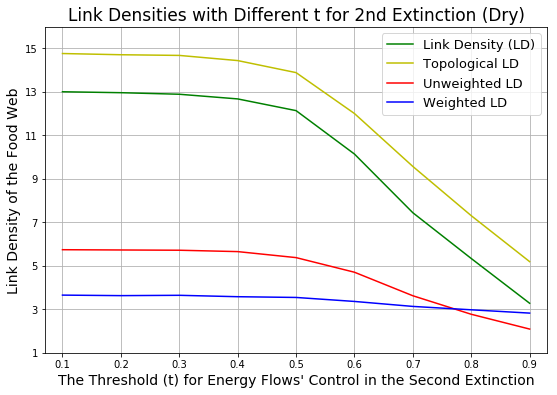

In [28]:
fig16 = plt.figure(figsize=(9,6))

plt.plot(threshold, link_density_dry_t,color="g",label = 'Link Density (LD)')
plt.plot(threshold, topo_link_density_dry_t,color="y",label = 'Topological LD')
plt.plot(threshold, unweighted_density_dry_t,color="r",label = 'Unweighted LD')
plt.plot(threshold, weighted_density_dry_t,color="b",label = 'Weighted LD')

plt.xlim((0.07, 0.93))
plt.ylim((1, 16))

my_x_ticks = np.arange(0.1, 0.93, 0.1)
my_y_ticks = np.arange(1, 16, 2)

plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)

plt.xlabel("The Threshold (t) for Energy Flows' Control in the Second Extinction",fontsize=14)
plt.ylabel("Link Density of the Food Web",fontsize=14)

plt.title("Link Densities with Different t for 2nd Extinction (Dry)",fontsize=17)

plt.legend(fontsize=13)
plt.grid()
plt.show()

fig16.savefig('02_Link Densities_Dry.jpg')

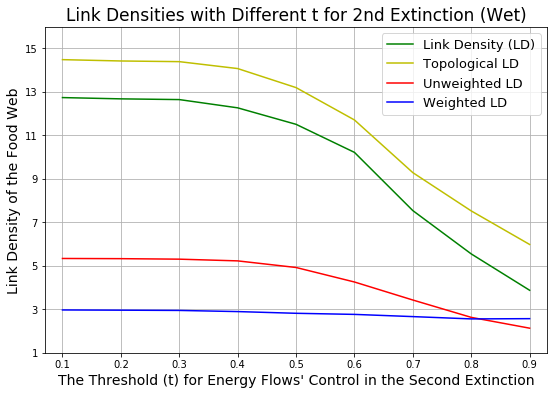

In [29]:
fig17 = plt.figure(figsize=(9,6))

plt.plot(threshold, link_density_wet_t,color="g",label = 'Link Density (LD)')
plt.plot(threshold, topo_link_density_wet_t,color="y",label = 'Topological LD')
plt.plot(threshold, unweighted_density_wet_t,color="r",label = 'Unweighted LD')
plt.plot(threshold, weighted_density_wet_t,color="b",label = 'Weighted LD')

plt.xlim((0.07, 0.93))
plt.ylim((1, 16))

my_x_ticks = np.arange(0.1, 0.93, 0.1)
my_y_ticks = np.arange(1, 16, 2)

plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)

plt.xlabel("The Threshold (t) for Energy Flows' Control in the Second Extinction",fontsize=14)
plt.ylabel("Link Density of the Food Web",fontsize=14)

plt.title("Link Densities with Different t for 2nd Extinction (Wet)",fontsize=17)

plt.legend(fontsize=13)
plt.grid()
plt.show()

fig17.savefig('02_Link Densities_Wet.jpg')